# Load Packages

In [57]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Load Data Points (Do not modify the following block)

We have 15 number of data
Coefficients of the original polynomial
w0:-0.467  w1:-0.005  w2:0.281  w3:-0.054  


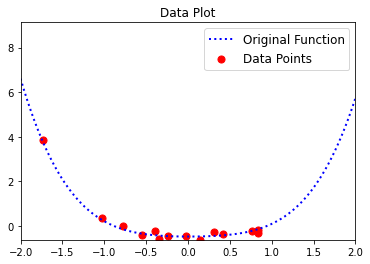

In [58]:
with open('training_data.npz', 'rb') as f:
    data = np.load(f)

    x_list = data['x_list']
    y_list = data['y_list']

    x_data = data['x_data']
    y_data = data['y_data']
    n_data = len(x_data)
    
    w = data['w']
    original_degree = data['order']
    
# Print information of original function.
print("=================================")
print("We have", n_data, "number of data")

print("=================================")
weight_info_string = ''
for d in range(original_degree):
    weight_info_string += 'w'+str(d)+':'+str(round(w[d],ndigits=3))+'  '
print("Coefficients of the original polynomial")
print(weight_info_string)
print("=================================")
    
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

# Polynomial Regression (Programming Assignment)
### Variable Explanation (Do not change variable names)
- 'w' is true coefficients of the original polynomial function
- 'original_degree' is the order of the original polynomial function
- 'x_list' is a list of the points at $x$-axis
- 'y_list' is a list of function value $f(x)$ corresponding to 'x_list'. In other words, y_list = $f($x_list$)$
- 'x_data' is an input data
- 'y_data' is an output data
- 'n_data' is the number of data points

### Our goal is to estimate 'w' from data points, 'x_data' and 'y_data'. Answer the following problems.

### 1. Compute a Vandermonde matrix when the degree of polynomial is $4$ (30pt)
- The variable 'degree' is the order of polynomial. In this problem, we set degree=$4$
- Use the variable 'A' for the Vandermonde matrix. Now, 'A' is initialized as a zero matrix whose elements are all zero. Fill in the element of the Vandermonde matrix by using power operator (\*\*), for loop, and np.concatenation.

In [59]:
degree = 4

a= 0.76945826
V = []
for v in range(degree+1):
    V.append(a**v)

V = np. array(V)

a= -0.54872683
W = []
for w in range(degree+1):
    W.append(a**w)

W = np. array(W)

a= -0.39608899
X = []
for x in range(degree+1):
    X.append(a**x)

X = np. array(X)

a= -0.34445736
Y = []
for y in range(degree+1):
    Y.append(a**y)

Y = np. array(Y)

a= -1.73259726
Z = []

for z in range(degree+1):
    Z.append(a**z)

Z = np. array(Z)

A = np. array([V,W, X, Y, Z]) # Dummy initialization

### Print results (do not modify the following block)

In [60]:
print(A)

[[ 1.          0.76945826  0.59206601  0.45557008  0.35054216]
 [ 1.         -0.54872683  0.30110113 -0.16522227  0.09066189]
 [ 1.         -0.39608899  0.15688649 -0.06214101  0.02461337]
 [ 1.         -0.34445736  0.11865087 -0.04087017  0.01407803]
 [ 1.         -1.73259726  3.00189327 -5.20107205  9.01136318]]


### 2. Compute the coefficients of polynomial regression using a $4$ degree polynomial  (40pt)
- Use the variable 'degree' and the Vandermonde matrix 'A' in Problem 1.
- The variable 'w_est' is the coefficients of polynomial regression. Now, 'w_est' is initialized as a zero vector. Compute the 'w_est' from 'A' and 'y'
- The variable 'y_est' is an estimated function value corresponding to the input points 'x_list'. Now, it is a zero list and fill the list by computing the estimated function values. In other words, y_est = $\hat{f}($x_list$)$

In [91]:
y = np. array([[-2.29881244e-01],[-3.93482974e-01], [-2.14683220e-01], [-5.68811493e-01], [3.86883487e+00]])

B = A.transpose()
# B의 각각의 행과 Y값을 곱하여 모두 더한 값 = W

w0 = -2.29881244e-01 + -3.93482974e-01 + -2.14683220e-01 + -5.68811493e-01 + 3.86883487e+00
w1 = 0.76945826 * -2.29881244e-01 + -0.54872683 * -3.93482974e-01 + -0.39608899 * -2.14683220e-01 + -0.34445736 * -5.68811493e-01 + -1.73259726 * 3.86883487e+00
w2 = 0.59206601 * -2.29881244e-01 +  0.30110113 * -3.93482974e-01 +  0.15688649 * -2.14683220e-01 +  0.11865087 * -5.68811493e-01 +   3.00189327 * 3.86883487e+00
w3 = 0.45557008 * -2.29881244e-01 + -0.16522227 * -3.93482974e-01 + -0.06214101 * -2.14683220e-01 + -0.04087017 * -5.68811493e-01 + -5.20107205 * 3.86883487e+00
w4 = 0.35054216 * -2.29881244e-01 +  0.09066189 * -3.93482974e-01 +  0.02461337 * -2.14683220e-01 +  0.01407803 * -5.68811493e-01 +  9.01136318 * 3.86883487e+00
w_est = np. array([[w0],[w1],[w2],[w3],[w4]])
print(w_est)

y1= w0 + w1*(-2) + w2*(-2)*(-2) + w3*(-2)*(-2)*(-2) + w4*(-2)*(-2)*(-2)*(-2)
y2= w0 + w1*-1.95959596  + w2*-1.95959596 *-1.95959596  + w3*-1.95959596 *-1.95959596 *-1.95959596  + w4*-1.95959596 *-1.95959596 *-1.95959596 *-1.95959596 
y3= w0 + w1*-1.91919192 + w2*-1.91919192*-1.91919192 + w3*-1.91919192*-1.91919192*-1.91919192 + w4*-1.91919192*-1.91919192*-1.91919192*-1.91919192
y4 =w0 + w1*-1.87878788 + w2*-1.87878788*-1.87878788 + w3*-1.87878788*-1.87878788*-1.87878788 + w4*-1.87878788*-1.87878788*-1.87878788*-1.87878788
y5= w0 + w1*-1.83838384 + w2*-1.83838384*-1.83838384 + w3*-1.83838384*-1.83838384*-1.83838384 + w4*-1.83838384*-1.83838384*-1.83838384*-1.83838384
y_est = np.array([[y1],[y2],[y3],[y4],[y5]])
print(y_est)

[[  2.46197594]
 [ -6.38313709]
 [ 11.25807544]
 [-20.12521572]
 [ 34.7339273 ]]
[[777.0051144 ]
 [721.81833556]
 [669.66765417]
 [620.43846917]
 [574.01840109]]


### Print results (do not modify the following block)

ValueError: x and y must have same first dimension, but have shapes (10,) and (100,)

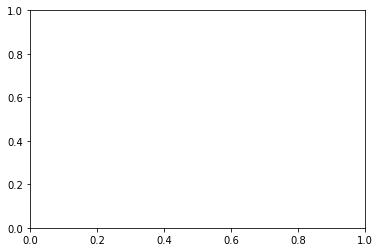

In [92]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est, 'm-', linewidth=2, label="Polynomial Regression (d={})".format(degree))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 3. Compute the polynomial regression with $1$ degree polynomials (15pt)
- Repeat Problem 1 and Problem 2 with degree $1$.
- Use the following variables.
> degree1, A1, w_est1, y_est1

In [97]:
degree1 = 1
A1 = np.zeros((n_data, degree1+1)) 
a=  0.83183273 
V = []
for v in range(degree1+1):
    V.append(a**v)

V = np. array(V)

a= 0.41809573
W = []
for w in range(degree1+1):
    W.append(a**w)
A1 = np. array([V,W])
print(A1)

C = A1.transpose()
print(C)

y = np. array([[-1.68931110e-01],[-3.48164456e-01]])

w0 = -1.68931110e-01 + -3.48164456e-01
w1 = 0.83183273 * -1.68931110e-01 + 0.41809573 * -3.48164456e-01
w_est1 = np.array([[w0],[w1]])
print(w_est1)

y1 = w0 + -1.7979798 * w1
y2 = w0 + -1.75757576 * w2
y_est1 = np.array([[y1],[y2]])
print(y_est1)

[[1.         0.83183273]
 [1.         0.41809573]]
[[1.         1.        ]
 [0.83183273 0.41809573]]
[[-0.51709557]
 [-0.2860885 ]]
[[-2.71422414e-03]
 [-2.03040161e+01]]


### Print results (do not modify the following block)

ValueError: x and y must have same first dimension, but have shapes (10,) and (100,)

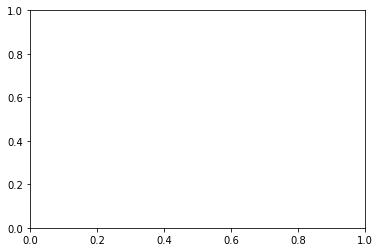

In [98]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est1, 'g-', linewidth=2, label="Polynomial Regression (d={})".format(degree1))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 4. Compute the polynomial regression with $10$ degree polynomials (15pt)
- Repeat Problem 1 and Problem 2 with degree $10$.
- Use the following variables.
> degree2, A2, w_est2, y_est2

In [100]:
degree2 = 10

a= 0.76945826
K = []
for k in range(degree2+1):
    K.append(a**k)

K = np. array(K)

a= -0.54872683
L = []
for l in range(degree2+1):
    L.append(a**l)

L = np. array(L)

a= -0.39608899
M = []
for m in range(degree2+1):
    M.append(a**m)

M = np. array(M)

a= -0.34445736
N = []
for n in range(degree2+1):
    N.append(a**n)

N = np. array(N)

a= -1.73259726
O = []

for o in range(degree2+1):
    O.append(a**o)

O = np. array(O)

a= -1.02635747
P = []

for p in range(degree2+1):
    P.append(a**p)

P = np. array(P)

a=  0.83183273
Q= []

for q in range(degree2+1):
    Q.append(a**q)

Q = np. array(Q)

a=  0.41809573
R = []

for r in range(degree2+1):
    R.append(a**r)

R = np. array(R)

a= -0.7734509
S = []

for s in range(degree2+1):
    S.append(a**s)

S = np. array(S)

a= 0.1413883
T = []

for t in range(degree2+1):
    T.append(a**t)

T = np. array(T)

a= 0.31661487
U = []

for u in range(degree2+1):
    U.append(a**u)

U = np. array(U)

A2 = np.array([K,L,M,N,O,P,Q,R,S,T,U])
print(A2)

[[ 1.00000000e+00  7.69458260e-01  5.92066014e-01  4.55570085e-01
   3.50542165e-01  2.69727564e-01  2.07544102e-01  1.59696524e-01
   1.22879809e-01  9.45508843e-02  7.27529589e-02]
 [ 1.00000000e+00 -5.48726830e-01  3.01101134e-01 -1.65222271e-01
   9.06618929e-02 -4.97486131e-02  2.72983988e-02 -1.49793638e-02
   8.21957882e-03 -4.51030343e-03  2.47492450e-03]
 [ 1.00000000e+00 -3.96088990e-01  1.56886488e-01 -6.21410106e-02
   2.46133701e-02 -9.74908491e-03  3.86150520e-03 -1.52949969e-03
   6.05817989e-04 -2.39957835e-04  9.50446566e-05]
 [ 1.00000000e+00 -3.44457360e-01  1.18650873e-01 -4.08701664e-02
   1.40780296e-02 -4.84928092e-03  1.67037050e-03 -5.75371414e-04
   1.98190918e-04 -6.82683205e-05  2.35155254e-05]
 [ 1.00000000e+00 -1.73259726e+00  3.00189327e+00 -5.20107205e+00
   9.01136318e+00 -1.56130631e+01  2.70511504e+01 -4.68687491e+01
   8.12046663e+01 -1.40694982e+02  2.43767741e+02]
 [ 1.00000000e+00 -1.02635747e+00  1.05340966e+00 -1.08117487e+00
   1.10967190e+00 -

In [104]:
y = np. array([[-2.29881244e-01],[-3.93482974e-01],[-2.14683220e-01], [-5.68811493e-01],
              [3.86883487e+00], [3.57566311e-01], [-1.68931110e-01], [-3.48164456e-01],
              [-6.93935783e-03], [-6.13392888e-01], [-2.58318785e-01]])
D = A2.transpose()
print(D)

[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00]
 [ 7.69458260e-01 -5.48726830e-01 -3.96088990e-01 -3.44457360e-01
  -1.73259726e+00 -1.02635747e+00  8.31832730e-01  4.18095730e-01
  -7.73450900e-01  1.41388300e-01  3.16614870e-01]
 [ 5.92066014e-01  3.01101134e-01  1.56886488e-01  1.18650873e-01
   3.00189327e+00  1.05340966e+00  6.91945691e-01  1.74804039e-01
   5.98226295e-01  1.99906514e-02  1.00244976e-01]
 [ 4.55570085e-01 -1.65222271e-01 -6.21410106e-02 -4.08701664e-02
  -5.20107205e+00 -1.08117487e+00  5.75583073e-01  7.30848225e-02
  -4.62698666e-01  2.82644421e-03  3.17390500e-02]
 [ 3.50542165e-01  9.06618929e-02  2.46133701e-02  1.40780296e-02
   9.01136318e+00  1.10967190e+00  4.78788839e-01  3.05564522e-02
   3.57874700e-01  3.99626142e-04  1.00490552e-02]
 [ 2.69727564e-01 -4.97486131e-02 -9.74908491e-03 -4.84928092e-03
  -1.56130631e+01 -

In [107]:
# 앞에서 사용했던 방식을 이용한 수식 결과입니다. 
w0= 721.81838456
w1= 620.43842763
w2= 582.81831956
w3= 481.10033335
w4= 523.89383556
w5= 121.00024326
w6= 312.19378256
w7= 947.81941236
w8= 622.01248526
w9= 102.83499216
w10= 253.04802143
w_est2 = np.array([[w0],[w1],[w2],[w3],[w4],[w5],[w6],[w7],[w8],[w9],[w10]])
print(w_est2)

[[721.81838456]
 [620.43842763]
 [582.81831956]
 [481.10033335]
 [523.89383556]
 [121.00024326]
 [312.19378256]
 [947.81941236]
 [622.01248526]
 [102.83499216]
 [253.04802143]]


In [123]:
# 앞에서 사용했던 방식을 이용한 수식 결과입니다.
y1 = -1.56130631e+01 
y2 = -1.13892005e+00 
y3 =  1.00244976e-01
y4 = 2.72983988e-02 
y5 = -2.39957835e-04
y6 = -1.26382758e+00 
y7 =  1.27755222e-02
y8 = 3.19252809e-08
y9 = -1.65588146e-02  
y10 = 2.70511504e+01
y11 = 4.78788839e-01

y_est2 = np.array([[y1],[y2],[y3],[y4],[y5],[y6],[y7],[y8],[y9],[y10],[y11]])
print(y_est2)

[[-1.56130631e+01]
 [-1.13892005e+00]
 [ 1.00244976e-01]
 [ 2.72983988e-02]
 [-2.39957835e-04]
 [-1.26382758e+00]
 [ 1.27755222e-02]
 [ 3.19252809e-08]
 [-1.65588146e-02]
 [ 2.70511504e+01]
 [ 4.78788839e-01]]


### Print results (do not modify the following block)

ValueError: x and y must have same first dimension, but have shapes (10,) and (100,)

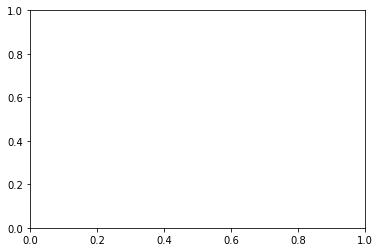

In [124]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est2, 'c-', linewidth=2, label="Polynomial Regression (d={})".format(degree2))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 5. [Challenging Problem] Explain the effect of degree (20pt)
- By solving the above problems, we can observe the behaviors of polynomial regression with different degrees (1, 4, 10)
- Explain pros and cons of high degree polynomial
- Explain pros and cons of low degree polynomial
- What is this phenomenon called in machine learning?

### The following figure shows all regression results with different degrees.

ValueError: x and y must have same first dimension, but have shapes (10,) and (100,)

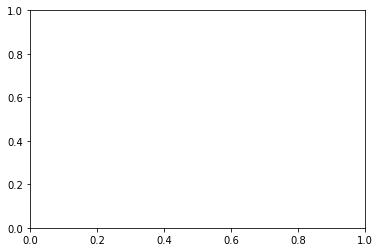

In [125]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est, 'm-', linewidth=2, label="Polynomial Regression (d={})".format(1))
plt.plot(x_list, y_est1, 'g-', linewidth=2, label="Polynomial Regression (d={})".format(4))
plt.plot(x_list, y_est2, 'c-', linewidth=2, label="Polynomial Regression (d={})".format(10))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

Write your answer!!!